# Breast Cancer Wisconsin Diagnosis

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [47]:
df=pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [48]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [49]:
df=df.drop(['Unnamed: 32','id'],axis=1)
df.shape

(569, 31)

In [50]:
def diagnosis_value(diagnosis):
    if diagnosis=='M':
        return 1
    else:
        return 0
    
df['diagnosis']=df['diagnosis'].apply(diagnosis_value)

/home/user/anaconda3/lib/python3.5/site-packages/seaborn/regression.py:424: UserWarning: Cannot set sticky_edges; requires newer matplotlib.
  warnings.warn(msg, UserWarning)


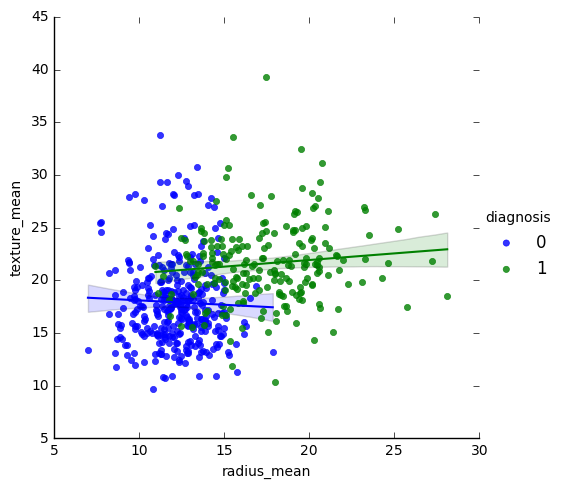

In [51]:
import seaborn as sns
sns.lmplot(x='radius_mean',y='texture_mean',hue='diagnosis',data=df)

/home/user/anaconda3/lib/python3.5/site-packages/seaborn/regression.py:424: UserWarning: Cannot set sticky_edges; requires newer matplotlib.
  warnings.warn(msg, UserWarning)


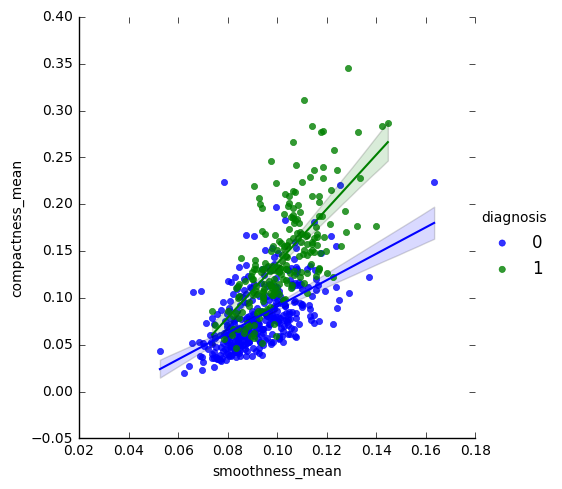

In [52]:
sns.lmplot(x='smoothness_mean',y='compactness_mean',data=df,hue='diagnosis')

In [58]:
X=np.array(df.iloc[:,1:])
y=np.array(df['diagnosis'])

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

knn=KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [59]:
knn.score(X_test,y_test)

0.9627659574468085

In [56]:
neighbors=[]
cv_scores=[]

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1,51,2):
    neighbors.append(k)
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 13


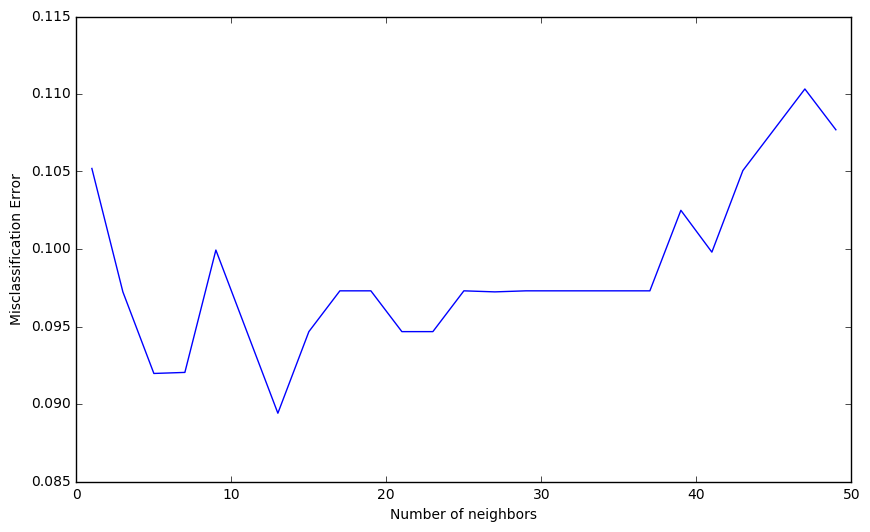

In [57]:
MSE=[1-x for x in cv_scores]

# determining the best k
optimal_k=neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d'%optimal_k)

# plot misclassification error versus k
plt.figure(figsize=(10,6))
plt.plot(neighbors,MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()